In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config IPCompleter.greedy=True
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
os.chdir("/Data_Task")
os.listdir('.')

['School data.xlsx']

# a) Import the “School data.xlsx” file and compute the total number of student enrolled in each school.

In [3]:
school = pd.ExcelFile('School data.xlsx')
school.sheet_names

['Data', 'District names']

In [4]:
school_data=school.parse('Data')
district_names = school.parse('District names')

In [4]:
school_data.head()

NameError: name 'school_data' is not defined

In [6]:
school_data.describe()

,district_id,attended_male,attended_female,enrolled_male_students,enrolled_female_students,treatment
count,6984.000000,6984.000000,6984.000000,6984.000000,6984.000000,6984.000000
mean,57.559708,253.302835,211.623711,531.897337,438.681987,0.497566
std,31.838156,85.753307,70.643882,266.401664,222.110178,0.500030
min,3.000000,0.000000,0.000000,-999.000000,-999.000000,0.000000
25%,39.000000,190.000000,161.000000,321.000000,267.000000,0.000000
50%,58.000000,247.000000,207.000000,479.000000,394.000000,0.000000
75%,79.000000,308.000000,257.000000,730.000000,601.000000,1.000000
max,200.000000,597.000000,483.000000,1194.000000,991.000000,1.000000


In [7]:
# Check for missing data
school_data.isnull().sum()

district_id                 0
attended_male               0
attended_female             0
enrolled_male_students      0
enrolled_female_students    0
treatment                   0
dtype: int64

In [16]:
district_names.head()
district_names=district_names.rename(columns={'DISTRICT ID':'district_id'})


In [17]:
district_names.head()

,district_id,District Name
0,78,Agago
1,79,Alebtong
2,3,Amolatar
3,80,Amudat
4,39,Amuru



## Compute the total number of student enrolled in each school.
### Hint: Each row of data contains data for each school within the district.

In [18]:
# We get the total number of student enrolled in each school by adding enrolled_male_students and enrolled_female_students columns
school_data['total_enrolled'] = school_data['enrolled_male_students'] + school_data['enrolled_female_students']
school_data.total_enrolled.head()

0    1389
1    1544
2    1280
3    1551
4    1128
Name: total_enrolled, dtype: int64

# b) Create the school ID variable by first sorting the data within each district by the total number of enrollees per school. Let the ID be 1 for the school within each district with the highest number of enrolled students, 2 for the second highest and so on.

In [19]:
df= school_data.copy()
df.head()

,district_id,attended_male,attended_female,enrolled_male_students,enrolled_female_students,treatment,total_enrolled
0,78,208,205,769,620,1,1389
1,78,337,281,859,685,0,1544
2,78,215,162,695,585,0,1280
3,78,200,167,850,701,0,1551
4,78,128,137,609,519,1,1128


In [20]:
df = df.groupby('district_id').apply(lambda x: x.sort_values('total_enrolled', ascending=False)).reset_index(drop=True)
df['school_id'] = df.groupby('district_id')['total_enrolled'].rank(method='first', ascending=False)

In [21]:
df.head()

,district_id,attended_male,attended_female,enrolled_male_students,enrolled_female_students,treatment,total_enrolled,school_id
0,3,212,177,1020,959,0,1979,1.0
1,3,335,331,985,962,1,1947,2.0
2,3,261,186,1139,807,0,1946,3.0
3,3,208,166,1014,920,0,1934,4.0
4,3,238,184,1050,881,1,1931,5.0


In [22]:
df.tail()

,district_id,attended_male,attended_female,enrolled_male_students,enrolled_female_students,treatment,total_enrolled,school_id
6979,200,224,199,311,258,1,569,10.0
6980,200,224,199,311,258,1,569,11.0
6981,200,237,207,254,220,1,474,12.0
6982,200,169,146,171,147,1,318,13.0
6983,200,169,146,171,147,0,318,14.0


#  c) Add district names to the main dataset using data from the second sheet. Make sure all towns are named and drop any irrelevant towns.

In [23]:
# Check if the number of unique district_id in both sheets
df['district_id'].nunique(), district_names['district_id'].nunique()

(28, 30)

In [24]:
# Check if all district_id in the school data are in district names data
x=df['district_id'].value_counts().keys()
y=district_names['district_id'].value_counts().keys()
x.isin(y)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False])

In [25]:
print('district_id 200 is missing in the district_names dataframe. This will ommit some data from our school dataframe')

district_id 200 is missing in the district_names dataframe. This will ommit some data from our school dataframe


In [26]:
data = df.merge(district_names, on='district_id')
print("After merging the two sheets, we get a total of {} schools.".format(data['district_id'].count()))

After merging the two sheets, we get a total of 6970 schools.


In [27]:
data.head()

,district_id,attended_male,attended_female,enrolled_male_students,enrolled_female_students,treatment,total_enrolled,school_id,District Name
0,3,212,177,1020,959,0,1979,1.0,Amolatar
1,3,335,331,985,962,1,1947,2.0,Amolatar
2,3,261,186,1139,807,0,1946,3.0,Amolatar
3,3,208,166,1014,920,0,1934,4.0,Amolatar
4,3,238,184,1050,881,1,1931,5.0,Amolatar


In [28]:
# We format the District Name column
# data = data.rename(columns={'District Name':'district_name'})
data.head()

,district_id,attended_male,attended_female,enrolled_male_students,enrolled_female_students,treatment,total_enrolled,school_id,District Name
0,3,212,177,1020,959,0,1979,1.0,Amolatar
1,3,335,331,985,962,1,1947,2.0,Amolatar
2,3,261,186,1139,807,0,1946,3.0,Amolatar
3,3,208,166,1014,920,0,1934,4.0,Amolatar
4,3,238,184,1050,881,1,1931,5.0,Amolatar


# d) Check the numeric variables for outliers. What is the importance of this exercise? Explain how you handled outliers if there were any? If they weren’t give a brief explanation of how you would have handled them if they were present.

In [29]:
# Summary statistics
data.describe()

,district_id,attended_male,attended_female,enrolled_male_students,enrolled_female_students,treatment,total_enrolled,school_id
count,6970.000000,6970.000000,6970.000000,6970.000000,6970.000000,6970.000000,6970.000000,6970.000000
mean,57.273601,253.307891,211.623816,531.930416,438.726112,0.497274,970.656528,130.898709
std,31.222808,85.781391,70.677926,266.403643,222.125543,0.500028,485.917746,76.853836
min,3.000000,0.000000,0.000000,-999.000000,-999.000000,0.000000,-1998.000000,1.000000
25%,39.000000,190.000000,161.000000,321.000000,268.000000,0.000000,592.000000,65.000000
50%,58.000000,247.000000,207.000000,479.000000,394.000000,0.000000,870.500000,130.000000
75%,79.000000,308.000000,257.000000,730.000000,600.750000,1.000000,1331.750000,194.000000
max,108.000000,597.000000,483.000000,1194.000000,991.000000,1.000000,1999.000000,319.000000


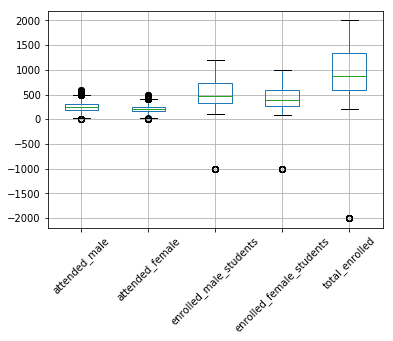

In [30]:
# We use boxplot to visualize for any outliers
data.boxplot(column=['attended_male', 'attended_female', 'enrolled_male_students', 'enrolled_female_students', 'total_enrolled'], rot=45)

In [31]:
print('From the boxplot above, outliers are present in form of negative count of students.')
print('There are negative values in enrolled_male_students and in enrolled_female_students leading to a negative total_enrolled')

From the boxplot above, outliers are present in form of negative count of students.
There are negative values in enrolled_male_students and in enrolled_female_students leading to a negative total_enrolled


In [32]:
# We clean our data from the outliers
data=data[data['total_enrolled']>0]
data.describe()

,district_id,attended_male,attended_female,enrolled_male_students,enrolled_female_students,treatment,total_enrolled,school_id
count,6948.000000,6948.000000,6948.000000,6948.000000,6948.000000,6948.000000,6948.000000,6948.000000
mean,57.266839,253.421128,211.712435,536.777634,443.278210,0.497265,980.055843,130.489493
std,31.217074,85.762862,70.669681,252.489157,207.195765,0.500029,457.022744,76.616889
min,3.000000,0.000000,0.000000,106.000000,88.000000,0.000000,204.000000,1.000000
25%,39.000000,190.000000,161.000000,322.000000,269.000000,0.000000,593.000000,65.000000
50%,58.000000,247.000000,207.000000,481.000000,395.000000,0.000000,873.500000,129.000000
75%,79.000000,309.000000,257.000000,731.000000,601.000000,1.000000,1333.250000,193.250000
max,108.000000,597.000000,483.000000,1194.000000,991.000000,1.000000,1999.000000,319.000000


# e) Label values for the treatment variable appropriately (1 = Treatment, 0 = Control).

In [33]:
data['treatment_type'] = np.where(data['treatment']==1, 'Treatment', 'Control')
data.head()

,district_id,attended_male,attended_female,enrolled_male_students,enrolled_female_students,treatment,total_enrolled,school_id,District Name,treatment_type
0,3,212,177,1020,959,0,1979,1.0,Amolatar,Control
1,3,335,331,985,962,1,1947,2.0,Amolatar,Treatment
2,3,261,186,1139,807,0,1946,3.0,Amolatar,Control
3,3,208,166,1014,920,0,1934,4.0,Amolatar,Control
4,3,238,184,1050,881,1,1931,5.0,Amolatar,Treatment


# f) Create a well labelled graph that shows the difference in female attendance between treatment and control schools.

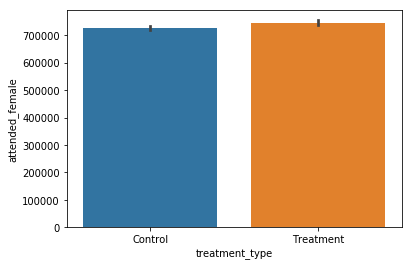

In [36]:
sns.barplot(x='treatment_type', y='attended_female', data=data, estimator=sum)

# g) Create a function that takes in a numeric variable and outputs a table of summary statistics and a histogram showing the distribution of the variable. Test out the function using variables in this dataset.

(count    6948.000000
 mean      211.712435
 std        70.669681
 min         0.000000
 25%       161.000000
 50%       207.000000
 75%       257.000000
 max       483.000000
 Name: attended_female, dtype: float64,
 <matplotlib.axes._subplots.AxesSubplot at 0x1d03b8feef0>)

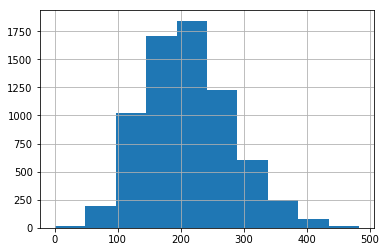

In [37]:
def sum_hist(a, x):
    return x.iloc[:, a].describe(), x.iloc[:, a].hist()
sum_hist(2, data)

# h) Regress total attendance on treatment, with district fixed-effects.
## We use OLS model


In [39]:
# We create a new column called total_attendance by adding attended_male to attended_female
data['total_attended'] = data['attended_male'] + data['attended_female']
data.head()
# data['average_attendance_per_district'] = data.groupby

,district_id,attended_male,attended_female,enrolled_male_students,enrolled_female_students,treatment,total_enrolled,school_id,District Name,treatment_type,total_attended
0,3,212,177,1020,959,0,1979,1.0,Amolatar,Control,389
1,3,335,331,985,962,1,1947,2.0,Amolatar,Treatment,666
2,3,261,186,1139,807,0,1946,3.0,Amolatar,Control,447
3,3,208,166,1014,920,0,1934,4.0,Amolatar,Control,374
4,3,238,184,1050,881,1,1931,5.0,Amolatar,Treatment,422


In [43]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
md = smf.mixedlm("total_attended ~ treatment", data, groups=data['district_id'])
mdf = md.fit()
print(mdf.summary())

           Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: total_attended
No. Observations: 6948    Method:             REML          
No. Groups:       27      Scale:              21799.9107    
Min. group size:  218     Likelihood:         -44599.6549   
Max. group size:  319     Converged:          Yes           
Mean group size:  257.3                                     
------------------------------------------------------------
               Coef.   Std.Err.   z    P>|z|  [0.025  0.975]
------------------------------------------------------------
Intercept      463.094    8.925 51.886 0.000 445.600 480.587
treatment        7.691    3.543  2.171 0.030   0.747  14.635
Group Var     1981.461    3.897                             



# i) Regress total attendance on treatment, with district fixed-effects and controlling for the total number of enrolled students at each school.

In [45]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
md = smf.mixedlm("total_attended ~ treatment + total_enrolled", data, groups=data['district_id'])
mdf = md.fit()
print(mdf.summary())

            Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: total_attended
No. Observations:  6948    Method:             REML          
No. Groups:        27      Scale:              21109.5774    
Min. group size:   218     Likelihood:         -44491.7199   
Max. group size:   319     Converged:          Yes           
Mean group size:   257.3                                     
-------------------------------------------------------------
                Coef.   Std.Err.   z    P>|z|  [0.025  0.975]
-------------------------------------------------------------
Intercept       405.977    9.464 42.897 0.000 387.428 424.526
treatment         8.405    3.487  2.411 0.016   1.572  15.239
total_enrolled    0.058    0.004 15.126 0.000   0.050   0.065
Group Var      1869.325    3.742                             



# j) Explain the statistical methodology used and reasons for the choice. Give a detailed description of the analysis results and why there are differences, if any, between model in (h) and (i). When displaying the table of outputs, leave out the district fixed effects.

# I used the p-value
## p-value helps you to decide whether there is a relationship between two variables or not.

## The smaller the p-value this mean the more confident you are about the existence of relationship between the two variables. The origins of p-values comes form hypothesis testing in statistics. In hypothesis testing, you have two hypothesis:

## H0 (called the null hypothesis ) : There is no relationship between the two variables.

## H1 (called the alternative hypothesis): There exist a relationship between the two variables.

## If the p-value is less than small threshold (often 0.05 is used), then you can reject the null hypothesis H0, which means that you decide that there is a relationship between the two variables.

## One intuitive interpretation of p-value: it is the likelihood of observing the data points when the null hypothesis is true (there is no relationship between the two variables). Therefore, if the p-value is too small this means that it is very unlikely that the dataset was generated by chance and we decide that null hypothesis is false.

# p-value for treatment in h is 0.03
# p-value for treatment in i is 0.016
## When controlling the enrollment, the p-value reduces greatly indicating great relationship between treatment and attendance.